# IMPORT LIBRARIES

In [9]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text
import urllib



# GET DATASET IN DATAFRAME

In [4]:
df_onlineretail = pd.read_csv('retail.csv')

# ANALYSING THE RAW DATASET

In [5]:
df_onlineretail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df_onlineretail.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
df_onlineretail.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

# DATA CLEANING FIX 1 - Dropping rows without Customer ID

In [8]:

df_onlineretail = df_onlineretail.dropna(subset=['Customer ID'])

In [9]:
df_onlineretail.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
df_onlineretail.drop_duplicates()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
df_onlineretail = df_onlineretail.drop_duplicates()

In [12]:
df_onlineretail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


# DATA CLEANING FIX 2 - Convert Datatype

In [13]:
# Floats use more space and are slightly slower than Integers. 
#   Converting to integer saves memory and speeds up operations.
df_onlineretail['Customer ID'] = df_onlineretail['Customer ID'].astype(int)

# function has intelligence to handle date format, timezones, and manages errors (like leap years)
df_onlineretail['InvoiceDate'] = pd.to_datetime(df_onlineretail['InvoiceDate'])

In [14]:
df_onlineretail['Customer ID'].dtype

dtype('int64')

In [15]:
df_onlineretail['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
Index: 797885 entries, 0 to 1067370
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
797885 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.2 MB


# DATA CLEANING FIX 3 - Create Revenue Attribute

In [16]:
df_onlineretail['Revenue'] = df_onlineretail['Quantity'] * df_onlineretail['Price']
df_onlineretail.head()  

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


# DATA CLEANING FIX 4 - Filtering valid sales only in new df

In [17]:
# Create a new DataFrame which contains only valid sales records that have positive Quantity and Price 
df_sales = df_onlineretail[(df_onlineretail['Quantity'] > 0) & (df_onlineretail['Price'] > 0)]

# DATA CLEANING FIX 5 - Duplicate records

In [18]:
df_sales.duplicated().sum()

np.int64(0)

In [19]:
df_sales.shape

(779425, 9)

In [20]:
df_sales.drop_duplicates

<bound method DataFrame.drop_duplicates of         Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer

# STATISTICAL ANALYSIS

In [21]:
df_sales.describe()

,Quantity,InvoiceDate,Price,Customer ID,Revenue
count,779425.000000,779425,779425.000000,779425.000000,779425.000000
mean,13.489370,2011-01-03 01:44:42.593475584,3.218488,15320.360461,22.291823
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-07-02 14:39:00,1.250000,13971.000000,4.950000
50%,6.000000,2010-12-02 14:09:00,1.950000,15247.000000,12.480000
75%,12.000000,2011-08-01 13:44:00,3.750000,16794.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000,168469.600000
std,145.855814,NaN,29.676140,1695.692775,227.427075


In [22]:
df_sales.shape

(779425, 9)

#  SQL CONNECTION

In [10]:
pip install pandas sqlalchemy pyodbc


Note: you may need to restart the kernel to use updated packages.


In [24]:
import pyodbc
print(pyodbc.drivers())

['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 18 for SQL Server']


In [11]:
params = urllib.parse.quote_plus(
    "DRIVER=ODBC Driver 18 for SQL Server;"
    "SERVER=ANIRUDH\\SQLEXPRESS;"
    "DATABASE=OnlineRetail;"
    "Trusted_Connection=yes;"
    "Encrypt=yes;"
    "TrustServerCertificate=yes;"
)

engine = create_engine(
    f"mssql+pyodbc:///?odbc_connect={params}",
    fast_executemany=True
)


# TEST CONNECTION

In [26]:
from sqlalchemy import text

with engine.connect() as conn:
    result = conn.execute(
        text("SELECT @@SERVERNAME AS server_name, DB_NAME() AS database_name")
    )
    print(result.fetchone())


('Anirudh\\SQLEXPRESS', 'OnlineRetail')


# LOAD DATA TO SQL

In [27]:
df_sales.to_sql(
    "fact_sales_raw",
    engine,
    if_exists="replace",
    index=False,
    chunksize=10000
)


-78

## Week 2

# LOAD "CUSTOMER 360 view" from SQL INTO PYTHON

In [14]:
query = """
SELECT
    CustomerID,
    Country,
    Frequency,
    Monetary,
    LastPurchaseDate
FROM dbo.vw_customer_360
"""
df_rfm = pd.read_sql(text(query), engine)

# RECENCY CALCULATION = days since last purchase, relative to a snapshot date.

In [ ]:
# Define snapshot date
snapshot_date = df_rfm['LastPurchaseDate'].max() + pd.Timedelta(days=1)
# +1 day to ensures customers who purchased on the max date have Recency = 1, not 0. Hence, avoid zero-day edge cases



In [17]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

# Calculate Recency

In [16]:
df_rfm['Recency'] = (snapshot_date - df_rfm['LastPurchaseDate']).dt.days

# RFM SCORING (1–5 SCALE) (quantile-based scoring)

In [18]:
df_rfm['R_Score'] = pd.qcut(
    df_rfm['Recency'],
    5,
    labels=[5, 4, 3, 2, 1]
) 
# Smaller days = better customer and hence recency label is reversed 

df_rfm['F_Score'] = pd.qcut(
    df_rfm['Frequency'].rank(method='first'),
    5,
    labels=[1, 2, 3, 4, 5]
)

df_rfm['M_Score'] = pd.qcut(
    df_rfm['Monetary'],
    5,
    labels=[1, 2, 3, 4, 5]
) 


# Total RFM Score

In [19]:
df_rfm['RFM_Score'] = (
    df_rfm['R_Score'].astype(int) +
    df_rfm['F_Score'].astype(int) +
    df_rfm['M_Score'].astype(int)
)

# Range Min = 3; and Max = 15;

# BUSINESS SEGMENTATION

In [20]:
def segment_customer(score):
    if score >= 13:
        return "Champions"
    elif score >= 10:
        return "Loyalists"
    elif score >= 7:
        return "Potential / At Risk"
    else:
        return "Hibernating"

df_rfm['Segment'] = df_rfm['RFM_Score'].apply(segment_customer)
# Clean way to apply conditional logic for segmentation


In [21]:
df_rfm.head()

,CustomerID,Country,Frequency,Monetary,LastPurchaseDate,Recency,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,United Kingdom,12,77556.46,2011-01-18 10:01:00,326,2,5,5,12,Loyalists
1,12347,Iceland,8,4921.53,2011-12-07 15:52:00,2,5,4,5,14,Champions
2,12348,Finland,5,2019.40,2011-09-25 13:13:00,75,3,4,4,11,Loyalists
3,12349,Italy,4,4428.69,2011-11-21 09:51:00,19,5,3,5,13,Champions
4,12350,Norway,1,334.40,2011-02-02 16:01:00,310,2,1,2,5,Hibernating


# VALIDATION

In [22]:
# Segment distribution
df_rfm['Segment'].value_counts()

# Few Champions 
# More Loyalists 
# Many At Risk / Hibernating


Segment
Hibernating            1773
Potential / At Risk    1453
Loyalists              1357
Champions              1295
Name: count, dtype: int64

In [23]:
# Revenue by segment
df_rfm.groupby('Segment')['Monetary'].mean().sort_values(ascending=False)


Segment
Champions              9678.169790
Loyalists              2263.048494
Potential / At Risk     852.608529
Hibernating             299.930847
Name: Monetary, dtype: float64

In [24]:
# Recency sanity check - Champions must have lowest recency
df_rfm.groupby('Segment')['Recency'].mean()


Segment
Champions               25.820077
Hibernating            410.024817
Loyalists               95.745026
Potential / At Risk    201.715072
Name: Recency, dtype: float64

# SAVE RESULTS (FOR DASHBOARDS)

In [25]:
df_rfm_final = df_rfm[[
    'CustomerID',
    'Country',
    'Recency',
    'Frequency',
    'Monetary',
    'RFM_Score',
    'Segment'
]]


In [26]:
df_rfm_final.head()

,CustomerID,Country,Recency,Frequency,Monetary,RFM_Score,Segment
0,12346,United Kingdom,326,12,77556.46,12,Loyalists
1,12347,Iceland,2,8,4921.53,14,Champions
2,12348,Finland,75,5,2019.40,11,Loyalists
3,12349,Italy,19,4,4428.69,13,Champions
4,12350,Norway,310,1,334.40,5,Hibernating


# LOAD TRANSACTION DATA

In [27]:
query = """
SELECT
    CustomerID,
    InvoiceDate,
    Revenue
FROM dbo.fact_sales
"""
df_txn = pd.read_sql(query, engine)


# CREATE COHORT MONTH (FIRST PURCHASE)

In [28]:
# Convert to month granularity
df_txn['InvoiceMonth'] = df_txn['InvoiceDate'].dt.to_period('M')

# Identify first purchase month per customer
df_txn['CohortMonth'] = (
    df_txn
    .groupby('CustomerID')['InvoiceMonth']
    .transform('min')
)

# transform('min')? to Keep row-level structure and allow later aggregation


# CALCULATE COHORT INDEX (TIME OFFSET)

In [29]:
# Convert Period → timestamp
invoice_date = df_txn['InvoiceMonth'].dt.to_timestamp()
cohort_date = df_txn['CohortMonth'].dt.to_timestamp()

# Compute month difference
df_txn['CohortIndex'] = (
    (invoice_date.dt.year - cohort_date.dt.year) * 12 +
    (invoice_date.dt.month - cohort_date.dt.month) + 1
)



# BUILD COHORT TABLE (RETENTION COUNTS)

In [30]:
# Count active customers per cohort per month
cohort_data = (
    df_txn
    .groupby(['CohortMonth', 'CohortIndex'])['CustomerID']
    .nunique()
    .reset_index()
)


In [31]:
# Pivot into cohort matrix
cohort_pivot = cohort_data.pivot(
    index='CohortMonth',
    columns='CohortIndex',
    values='CustomerID'
)
cohort_pivot

# Rows → cohort month
# Columns → months since acquisition
# Values → active customers



CohortIndex,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,...,289.0,251.0,289.0,270.0,248.0,244.0,301.0,291.0,389.0,188.0
2010-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,...,58.0,90.0,76.0,71.0,75.0,93.0,74.0,94.0,22.0,NaN
2010-02,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,...,75.0,60.0,61.0,54.0,86.0,86.0,61.0,22.0,NaN,NaN
2010-03,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,48.0,...,75.0,77.0,69.0,78.0,89.0,94.0,35.0,NaN,NaN,NaN
2010-04,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,31.0,32.0,...,46.0,41.0,44.0,53.0,66.0,17.0,NaN,NaN,NaN,NaN
2010-05,254.0,40.0,43.0,44.0,45.0,65.0,54.0,32.0,15.0,21.0,...,32.0,35.0,42.0,39.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,47.0,51.0,55.0,62.0,77.0,34.0,24.0,22.0,32.0,...,33.0,36.0,55.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,29.0,34.0,55.0,54.0,26.0,21.0,27.0,27.0,21.0,...,32.0,44.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,33.0,48.0,52.0,28.0,19.0,16.0,20.0,22.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RETENTION RATE

In [62]:
# Get cohort sizes (month 1)
cohort_sizes = cohort_pivot.iloc[:, 0]

# Calculate retention %
retention = cohort_pivot.divide(cohort_sizes, axis=0)


# SANITY CHECK

In [33]:
retention.iloc[:, 0].unique()


array([1.])

In [ ]:
df_txn['InvoiceDate'] = pd.to_datetime(df_txn['InvoiceDate'])
df_txn['InvoiceMonth'] = df_txn['InvoiceDate'].dt.to_period('M')

# Cohorts are usually monthly
# Periods are easier than raw dates

# FIND EACH CUSTOMER’S COHORT MONTH

In [ ]:
df_txn['CohortMonth'] = (
    df_txn
    .groupby('CustomerID')['InvoiceMonth']
    .transform('min')
)

# transform('min') assigns the first purchase month to every row of that customer

# CALCULATE COHORT INDEX (MONTH OFFSET)

In [ ]:
df_txn['CohortIndex'] = (
    df_txn['InvoiceMonth'] - df_txn['CohortMonth']
).apply(lambda x: x.n)

# CohortIndex is simply the difference between InvoiceMonth and CohortMonth in number of months
# Subtracting periods gives a Period difference 
# .n extracts number of months


# COUNT ACTIVE CUSTOMERS PER COHORT & MONTH

In [66]:
cohort_data = (
    df_txn
    .groupby(['CohortMonth', 'CohortIndex'])['CustomerID']
    .nunique()
    .reset_index()
    .rename(columns={'CustomerID': 'ActiveCustomers'})
)


# GET COHORT SIZE (MONTH 0)

In [67]:
cohort_size = (
    cohort_data
    [cohort_data['CohortIndex'] == 0]
    [['CohortMonth', 'ActiveCustomers']]
    .rename(columns={'ActiveCustomers': 'CohortSize'})
)


# CALCULATE RETENTION RATE

In [68]:
cohort_table = cohort_data.merge(
    cohort_size,
    on='CohortMonth'
)

cohort_table['RetentionRate'] = (
    cohort_table['ActiveCustomers'] /
    cohort_table['CohortSize']
)


In [69]:
cohort_table

,CohortMonth,CohortIndex,ActiveCustomers,CohortSize,RetentionRate
0,2009-12,0,955,955,1.000000
1,2009-12,1,337,955,0.352880
2,2009-12,2,319,955,0.334031
3,2009-12,3,406,955,0.425131
4,2009-12,4,363,955,0.380105
...,...,...,...,...,...
320,2011-10,1,71,221,0.321267
321,2011-10,2,35,221,0.158371
322,2011-11,0,191,191,1.000000
323,2011-11,1,27,191,0.141361


In [70]:
cohort_table.head()
cohort_table.dtypes

CohortMonth        period[M]
CohortIndex            int64
ActiveCustomers        int64
CohortSize             int64
RetentionRate        float64
dtype: object

# CONVERT COHORTMONTH TO DATE (Power BI prefers date)

In [71]:
cohort_table['CohortMonth'] = cohort_table['CohortMonth'].dt.to_timestamp()


# WRITE TO SQL SERVER

In [72]:
cohort_table.to_sql(
    name="cohort_table",
    con=engine,
    schema="dbo",
    if_exists="replace",
    index=False,
    chunksize=1000
)


-1

# COHORT RETENTION HEATMAP
# retention       -  retention percentage matrix
# cohort_pivot    - customer counts

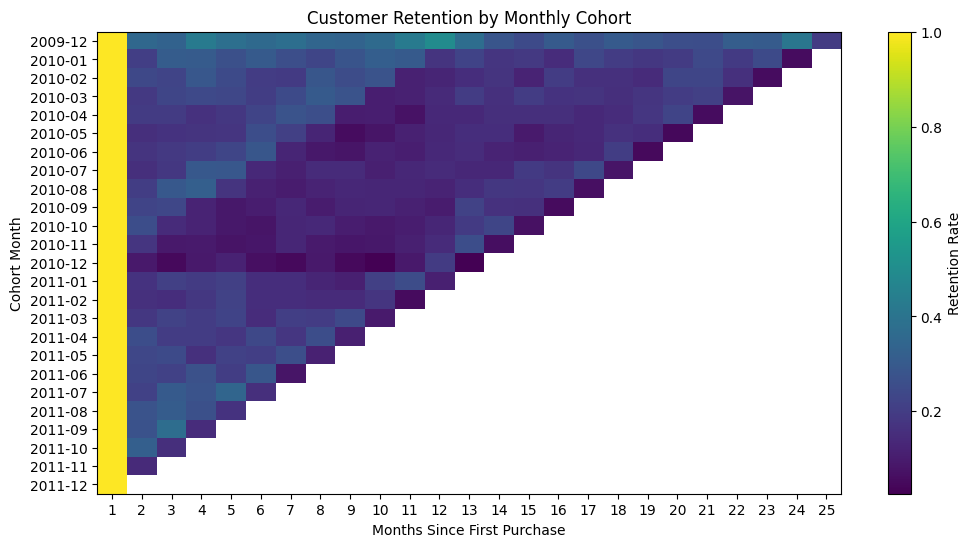

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.imshow(retention, aspect='auto')
plt.colorbar(label='Retention Rate')

plt.title('Customer Retention by Monthly Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')

plt.xticks(
    ticks=range(len(retention.columns)),
    labels=retention.columns
)

plt.yticks(
    ticks=range(len(retention.index)),
    labels=retention.index.astype(str)
)

plt.show()

# Rows → acquisition month
# Columns → months since acquisition
# Darker color → higher retention

# RETENTION CURVE (AVERAGE COHORT BEHAVIOR)

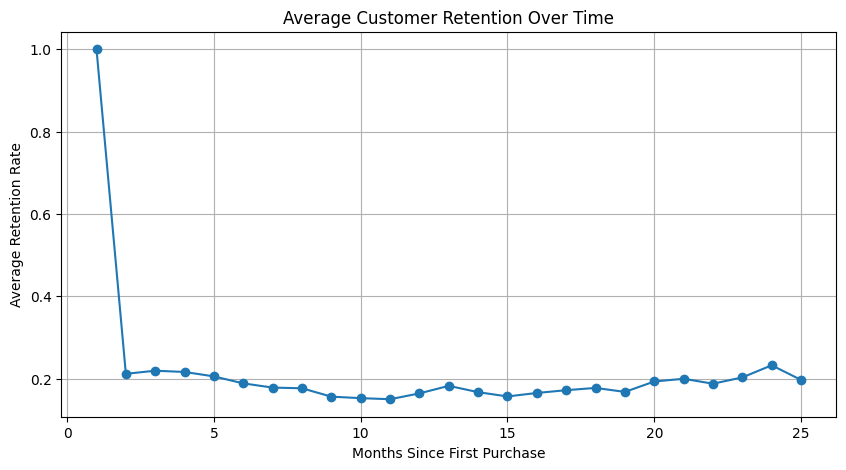

In [35]:
# This shows how fast customers churn overall
avg_retention = retention.mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_retention.index, avg_retention.values, marker='o')

plt.title('Average Customer Retention Over Time')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Average Retention Rate')
plt.grid(True)

plt.show()

# Steep drop early → onboarding problem
# Gradual decay → natural churn
# Flat curve → strong product stickiness


# COHORT SIZE TREND (CONTEXT CHART)

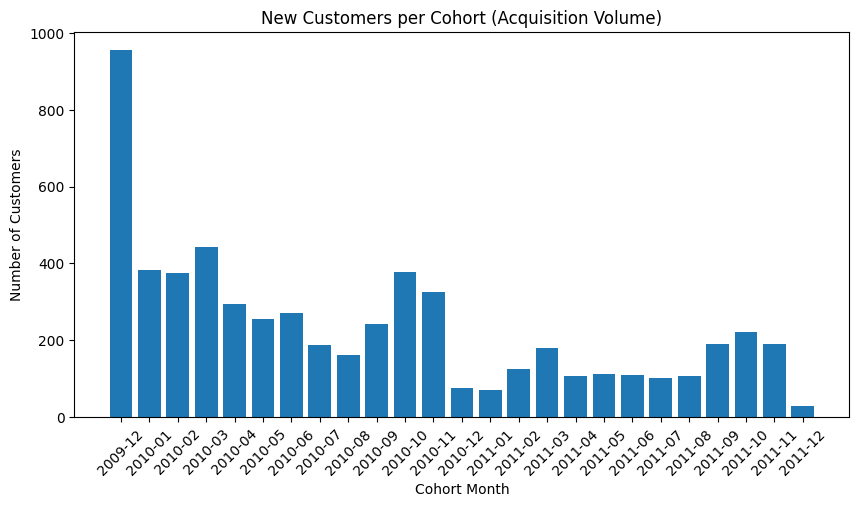

In [36]:
cohort_sizes = cohort_pivot.iloc[:, 0]

plt.figure(figsize=(10, 5))
plt.bar(
    cohort_sizes.index.astype(str),
    cohort_sizes.values
)

plt.title('New Customers per Cohort (Acquisition Volume)')
plt.xlabel('Cohort Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.show()

# Count active customers per cohort per month
# Small cohorts can show high retention (false optimism)
# Large cohorts with poor retention = acquisition quality issue

# MARKET BASKET ANALYSIS (MBA)

In [37]:
query = """
SELECT
    f.Invoice,
    p.Description,
    f.Quantity
FROM dbo.fact_sales f
JOIN dbo.dim_product p
    ON f.StockCode = p.StockCode
WHERE f.Quantity > 0
"""
df_basket = pd.read_sql(query, engine)



# QUICK SANITY CHECK

In [42]:
df_basket.head()


,Invoice,Description,Quantity
0,491725,This is a test product.,10
1,491742,This is a test product.,5
2,491744,This is a test product.,5
3,492718,This is a test product.,5
4,492722,This is a test product.,1


In [38]:
df_basket.shape


(1009481, 3)

In [39]:
# # BUILD THE BASKET MATRIX (INVOICE × PRODUCT)
basket = (
    df_basket
    .groupby(['Invoice', 'Description'])['Quantity']
    .sum()
    .unstack()
    .fillna(0)
)
# Groups products within the same invoice
# One invoice = one shopping basket
# Quantity is aggregated safely


In [45]:
# # CONVERT TO BINARY MATRIX
# Not working basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)

basket_binary = (basket > 0).astype(int)
basket_binary.head()

# Apriori does NOT work on quantities. It only cares about presence/absence of products in the basket.
# Association rules are based on presence. Quantities distort probabilities


Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# mlxtend Installtion

In [46]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
print(sys.executable)

e:\Infotact\rfm_env\Scripts\python.exe


In [47]:
import mlxtend
print(mlxtend.__version__)

0.24.0


# # RUN APRIORI ALGORITHM

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(
    basket_binary,
    min_support=0.02,
    use_colnames=True
)

rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=1
)



e:\Infotact\rfm_env\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:175: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MemoryError: Unable to allocate 21.1 GiB for an array with shape (38226, 2, 36969) and data type int64

In [ ]:
# Apriori is  internally trying all combinations of products where we have Hundreds / thousands of products and invoices
# Combination explosion = RAM blow-up. Never run Apriori on all products.
# Hence, we set a higher min_support to limit combinations. 

# KEEP ONLY TOP-N PRODUCTS

In [ ]:
# Reduce dimensionality

# % of invoices containing each product
product_support = basket_binary.mean()

# Keep products appearing in at least 1% of baskets
frequent_products = product_support[product_support >= 0.01].index

basket_reduced = basket_binary[frequent_products]


# RUN APRIORI AGAIN

In [ ]:
# Run memory-safe apriori
frequent_itemsets = apriori(
    basket_reduced,
    min_support=0.02,
    use_colnames=True,
    max_len=2,
    low_memory=True
)
# mlxtend has a memory-optimized mode i.e USE low_memory=True
# 2-item sets = 90% of value
# 3+ item sets = diminishing returns


e:\Infotact\rfm_env\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:175: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [55]:
frequent_itemsets

,support,itemsets
0,0.022424,frozenset({ 3 STRIPEY MICE FELTCRAFT})
1,0.023452,frozenset({ RED/WHITE DOT MINI CASES})
2,0.049717,frozenset({11 PC CERAMIC TEA SET POLKADOT})
3,0.020639,frozenset({12 PENCILS SMALL TUBE RED RETROSPOT})
4,0.020639,frozenset({12 PENCILS SMALL TUBE RED SPOTTY})
...,...,...
484,0.023182,"frozenset({STRAWBERRY CERAMIC TRINKET POT, SWE..."
485,0.025724,"frozenset({STRAWBERRY LUNCH BOX WITH CUTLERY, ..."
486,0.020395,"frozenset({TEACUP AND SAUCER REGENCY GREEN, TE..."
487,0.021396,"frozenset({TOY TIDY PINK RETROSPOT , TOY TIDY..."


# Market Basket Rules (MBA Rules)

In [56]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=1
)


In [57]:
mba_rules_df = rules[[
    "antecedents",
    "consequents",
    "support",
    "confidence",
    "lift"
]].copy()

mba_rules_df["antecedents"] = mba_rules_df["antecedents"].astype(str)
mba_rules_df["consequents"] = mba_rules_df["consequents"].astype(str)


In [58]:
mba_rules_df.head()

,antecedents,consequents,support,confidence,lift
0,frozenset({' 3 STRIPEY MICE FELTCRAFT'}),frozenset({'3 STRIPEY MICE FELTCRAFT'}),0.022424,1.0,44.594692
1,frozenset({'3 STRIPEY MICE FELTCRAFT'}),frozenset({' 3 STRIPEY MICE FELTCRAFT'}),0.022424,1.0,44.594692
2,frozenset({' RED/WHITE DOT MINI CASES'}),frozenset({'RED RETROSPOT MINI CASES'}),0.023452,1.0,42.640138
3,frozenset({'RED RETROSPOT MINI CASES'}),frozenset({' RED/WHITE DOT MINI CASES'}),0.023452,1.0,42.640138
4,frozenset({' RED/WHITE DOT MINI CASES'}),frozenset({'RED/WHITE DOT MINI CASES'}),0.023452,1.0,42.640138


In [59]:
mba_rules_df.dtypes


antecedents        str
consequents        str
support        float64
confidence     float64
lift           float64
dtype: object

# WRITE TO SQL (CREATE TABLE)

In [60]:
mba_rules_df.to_sql(
    name="mba_rules",
    con=engine,
    schema="dbo",
    if_exists="replace",
    index=False,
    chunksize=1000
)


-1